## Trending YouTube Videos

This analysis has been done on data version 440 (10/17/2021). Please extract the content inside **./data**

In [77]:
import json
import pandas as pd
import re
from pyspark import SparkContext


In [78]:
sc.stop()
sc = SparkContext()

### Selecting a region to analyze
Below, you can set the region to analyze and the line display limit.
For this analysis, we will only be looking at data from the US.

In [79]:
# "Data is included for the IN, US, GB, DE, CA, FR, RU, BR, MX, KR, and JP regions 
# (India, USA, Great Britain, Germany, Canada, France, Russia, Brazil, Mexico, South Korea, and, Japan respectively)"
# please enter region in two letter format (like first line) and in quotation on variable region
region = "US"

#display_limit = 1000

The code below checks for existence of data, along with some initializations and error checking.

In [80]:
from os import listdir

data_files_location = {}
categories = {}

for f in listdir('./data'):
    if f.endswith('.json'):
        temp = json.load(open(f'./data/{f}'))
        for i in temp['items']:
            categories[i['id']] = i['snippet']['title']
    if f.endswith('.csv'):
        data_files_location[f[:2]] = f'./data/{f}'

if not categories:
    raise FileNotFoundError('can not locate any json category files')
    
if not data_files_location:
    raise FileNotFoundError('no CSV data files are located')

### Clean up the DataFrame 
- Load and assign CSV files onto variables with Pandas
- Remove unnecessary columns
- Map the categories from the .json file to 'categoryId' in DataFrame as a new column, labeled 'videoCategory'

In [81]:
data = pd.read_csv(data_files_location[region])
# drop unnecessary columns
data.drop(['thumbnail_link', 'comments_disabled', 'ratings_disabled'], inplace=True, axis=1)
# map categories to a new column 
data['videoCategory'] = data['categoryId'].astype(str).map(categories)

data

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,description,videoCategory
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,People & Blogs
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,"While running her own modding shop, Ramya Pare...",Gaming
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,I left youtube for a month and this is what ha...,Entertainment
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,Subscribe to XXL → http://bit.ly/subscribe-xxl...,Music
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,Transforming The LaBrant Family's empty white ...,Howto & Style
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87586,FdzPV69i4Aw,Great Idea 💡 #shorts #tips #short,2021-10-12T12:00:12Z,UCGLDtG2tl0uG8P0eNstbLUA,Tool_Tips,26,2021-10-17T00:00:00Z,[None],3241407,27687,9037,937,NaN,Howto & Style
87587,40_wdosHJaQ,I Was In The Funniest Minecraft Competition Wi...,2021-10-12T00:15:10Z,UCFbZ2e9IrPejOdp8wsKUxvA,QuackiTwo,24,2021-10-17T00:00:00Z,Quackity|Quackitwo|Quackity Second Channel|Qua...,425760,48882,215,1238,STREAMED LIVE ON TWITCH: https://www.twitch.tv...,Entertainment
87588,cNG1QNQPlNE,Summoner Changes | FFXIV Endwalker Media Tour,2021-10-13T12:00:29Z,UCQjKMGUEzBmEHltb1OIMLUg,Larryzaur,20,2021-10-17T00:00:00Z,ffxiv|final fantasy xiv|ff14|final fantasy 14|...,203634,7065,52,754,Endwalker Media Tour Playlist ► https://www.yo...,Gaming
87589,iYTK_1Sq8ZQ,Reaper Overview | FFXIV Endwalker Media Tour,2021-10-13T12:00:32Z,UCQjKMGUEzBmEHltb1OIMLUg,Larryzaur,20,2021-10-17T00:00:00Z,ffxiv|final fantasy xiv|ff14|final fantasy 14|...,210207,6884,43,540,Endwalker Media Tour Playlist ► https://www.yo...,Gaming


### Basic Analysis of Dataset

This dataset contains:
- a total of 87,591 entries
- 15,180 unique videos
- 4,252 unique channel IDs

Many videos and channels have duplicate entries in this dataset, as they can stay in top-trending for multiple days.

In [82]:
# number of unique videos in dataset
print(f"Unique videos: {data.video_id.nunique()}")
# number of unique channel IDs in dataset
print(f"Unique channel IDs: {data.channelId.nunique()}")
# number of unique channel titles in dataset
print(f"Unique channel titles: {data.channelTitle.nunique()}")

Unique videos: 15180
Unique channel IDs: 4252
Unique channel titles: 4310


#### Categories in Trending
Here, we take a look at the amount of videos that have trended in each category. The entertainment category has the most trending videos, and the nonprofits & activism category has the fewest.

In [83]:
category_count = data.videoCategory.value_counts()
category_count

Entertainment            17615
Music                    16552
Gaming                   14458
Sports                    9574
People & Blogs            7524
Comedy                    4721
Film & Animation          3364
News & Politics           3315
Science & Technology      3199
Howto & Style             2933
Education                 1870
Autos & Vehicles          1556
Pets & Animals             474
Travel & Events            351
Nonprofits & Activism       85
Name: videoCategory, dtype: int64

#### Appearance of Videos & Channels in Trending
Below, we analyze the number of times videos and channels have appeared in trending.

In [84]:
# number of times a video has been in top-trending videos
video_trend_count = data[['video_id', 'title']].value_counts().to_frame('count')

video_trend_count

,,count
video_id,title,
hdmx71UjBXs,Turn into orbeez - Tutorial #Shorts,36
aONT7atzqfw,"Floyd Mayweather vs Logan Paul: Fight goes the distance [Highlights, recap] | CBS Sports HQ",35
mcUpeaSX8BE,Israeli Iron Dome filmed intercepting rockets from Gaza,34
wY6UyatwVTA,"India claim stunning series win, end Australia's Gabba streak | Vodafone Test Series 2020-21",34
vrRfBmMWpLY,Golden Buzzer: 9-Year-Old Victory Brinker Makes AGT HISTORY! - America's Got Talent 2021,33
...,...,...
cAtazIk1IYw,How To Make a Curried Egg Sandwich,1
cC9aarA1Mhg,BTS (방탄소년단) PERMISSION TO DANCE ON STAGE Official Teaser | We’re just getting started,1
cDTayGZNRdg,Chucky TV Series Season 1 Premiere | Full Episode | USA Network & SYFY,1


In [85]:
vid_eq_one = (video_trend_count['count'] == 1).value_counts()
vid_eq_one
print(f"{vid_eq_one[0]} videos have trended more than once and {vid_eq_one[1]} have trended only once")

15006 videos have trended more than once and 550 have trended only once


Some channel IDs are associated with more than one channel title. Below, is a DataFrame that combines the multiple channel titles onto a single row in the 'channelTitle' column, matching its respective channel ID. Then shows the count of every channel according to channel ID.<br><br>
For this analysis, 'channel' will refer to the channel ID.

In [86]:
# combine titles with the same channel ID
comb_titles = data.groupby(['channelId'])
channel_trend_count = pd.DataFrame({'channelTitle(s)': comb_titles['channelTitle'].unique(), 'count': data['channelId'].value_counts()})
# number of times a channel has been in top-trending videos
channel_trend_count.sort_values('count', ascending=False)

,channelTitle(s),count
UCWJ2lWNubArHWmf3FIHbfcQ,[NBA],550
UCDVYQ4Zhbm3S2dlz7P1GBDg,[NFL],528
UCpB959t8iPrxQWj7G6n0ctQ,[SSSniperWolf],458
UCIPPMRA040LQr5QPyJEbmXA,[MrBeast Gaming],377
UCke6I9N4KfC968-yRcd5YRg,[SSundee],336
...,...,...
UC4Llz_FxdMEU0iWO4aG_Xjg,[Roadshow],1
UCHmv6QMb4xerJ8Tt5UBHjaw,[MegaToons],1
UCulu1KUYJ_2OBDouc_d-cUA,[Mat Watson Cars],1
UCLCCG11dS-HyB3up3OCRV_w,[Tivi Gunz],1


In [87]:
ch_eq_one = (channel_trend_count['count'] == 1).value_counts()

print(f"{ch_eq_one[0]} channels have multiple trend videos and {ch_eq_one[1]} have only one")

4216 channels have multiple trend videos and 36 have only one


#### Videos: Final and Initial Entries
- Filter out the duplicate entries to obtain the most recent number of view counts, likes, dislikes, and comment counts. 
- Sort the data to get the number of view counts, likes, dislikes, and comment counts for each video at the time it first begins trending.  

In [88]:
# obtain the most recent entry with the highest view count
final = data.sort_values('view_count', ascending=False).drop_duplicates(['video_id'])
final

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,description,videoCategory
56374,WMweEpGlu_U,BTS (방탄소년단) 'Butter' Official MV,2021-05-21T03:46:13Z,UC3IZKseVpdzPSBaWxBxundA,HYBE LABELS,10,2021-05-30T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,264407389,16021534,150989,6738537,BTS (방탄소년단) 'Butter' Official MV Credits: Dire...,Music
3358,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,10,2020-08-28T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,232649205,15735533,714194,6065230,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...,Music
73564,hdmx71UjBXs,Turn into orbeez - Tutorial #Shorts,2021-07-03T04:04:57Z,UCt8z2S30Wl-GQEluFVM8NUw,FFUNTV,24,2021-08-08T00:00:00Z,[None],206202284,6840430,240769,2826,Turn into orbeez - Tutorial #ShortsHey guys! W...,Entertainment
4980,vRXZj0DzXIA,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,2020-08-28T04:00:11Z,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK,10,2020-09-05T00:00:00Z,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,184778248,11795670,879354,2735997,BLACKPINK - ‘Ice Cream (with Selena Gomez)’Com...,Music
68979,CuklIb9d3fI,BTS (방탄소년단) 'Permission to Dance' Official MV,2021-07-09T03:59:12Z,UC3IZKseVpdzPSBaWxBxundA,HYBE LABELS,10,2021-07-16T00:00:00Z,HYBE|HYBE LABELS|하이브|하이브레이블즈,156482499,12117314,102132,2781218,BTS (방탄소년단) 'Permission to Dance' Official MVC...,Music
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15289,r7nYQXsxJdU,HBCU Homecoming 2020: Meet Me On The Yard,2020-10-25T01:40:31Z,UCqVDpXKLmKeBU_yyt_QkItQ,YouTube Originals,24,2020-10-27T00:00:00Z,2 CHAINZ|DESI BANKS|LIONEL RICHIE |LANCE GROSS...,0,4257,384,240,HBCU Homecoming 2020 is going down! We welcome...,Entertainment
65049,kmk5vciFbek,Demi Lovato performs their greatest hits this ...,2021-06-26T00:07:19Z,UCZkURf9tDolFOeuw_4RD7XQ,Demi Lovato,24,2021-06-27T00:00:00Z,Pride|Pride 2021|YouTube Pride|YouTube Pride 2...,0,0,0,138,"On June 25, celebrate Pride 2021 with Demi Lov...",Entertainment
74964,Hb3rmh-_FMw,Introducing the shorter side of YouTube,2021-08-10T15:04:25Z,UCBR8-60-B28hp2BmDPdntcQ,YouTube,27,2021-08-15T00:00:00Z,[None],0,22585,1636,0,*****EPILEPSY WARNING ********Watch and create...,Education
73992,HcSwBJY7Xew,Watch The Weeknd and create short videos on th...,2021-08-10T15:08:22Z,UCBR8-60-B28hp2BmDPdntcQ,YouTube,27,2021-08-11T00:00:00Z,[None],0,50071,7256,0,NaN,Education


In [89]:
# obtain the view counts as video first enters into trending videos
initial = data.sort_values('view_count', ascending=True).drop_duplicates(['video_id'])
initial

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,description,videoCategory
50455,hAxqygRdM4g,Earth Day 2021 Doodle,2021-04-21T11:00:14Z,UCdq61m8s_48EhJ5OM_MCeGw,GoogleDoodles,1,2021-04-25T00:00:00Z,[None],0,0,0,0,This year’s annual Earth Day Doodle highlights...,Film & Animation
74492,Hb3rmh-_FMw,Introducing the shorter side of YouTube,2021-08-10T15:04:25Z,UCBR8-60-B28hp2BmDPdntcQ,YouTube,27,2021-08-13T00:00:00Z,[None],0,22030,1604,0,*****EPILEPSY WARNING ********Watch and create...,Education
15289,r7nYQXsxJdU,HBCU Homecoming 2020: Meet Me On The Yard,2020-10-25T01:40:31Z,UCqVDpXKLmKeBU_yyt_QkItQ,YouTube Originals,24,2020-10-27T00:00:00Z,2 CHAINZ|DESI BANKS|LIONEL RICHIE |LANCE GROSS...,0,4257,384,240,HBCU Homecoming 2020 is going down! We welcome...,Entertainment
65263,ifJYb2An7wE,Gay And Not Proud - Daniel Howell | YouTube Pr...,2021-06-25T21:04:38Z,UCGjylN-4QCpn8XJ1uY-UOgA,Daniel Howell,24,2021-06-28T00:00:00Z,Pride|Pride 2021|YouTube Pride|YouTube Pride 2...,0,0,0,784,"On June 25, join Daniel Howell as he celebrate...",Entertainment
19967,AWXvClaRtsI,Celebrating Maria Tallchief,2020-11-14T22:39:13Z,UCdq61m8s_48EhJ5OM_MCeGw,GoogleDoodles,10,2020-11-20T00:00:00Z,[None],0,0,0,0,In honor of Native American Heritage Month in ...,Music
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1800,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,10,2020-08-21T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,57229275,7045907,165420,2314087,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...,Music
65398,Fw7fbKoK3e8,MvRyhan Funny videos #tiktok #Shorts,2021-06-25T07:37:36Z,UCcFQLco2CA2uq9J2Uwcoi6Q,Mv Ryhan,24,2021-06-29T00:00:00Z,[None],59410897,1176893,39704,4850,#shorts,Entertainment
55605,WMweEpGlu_U,BTS (방탄소년단) 'Butter' Official MV,2021-05-21T03:46:13Z,UC3IZKseVpdzPSBaWxBxundA,HYBE LABELS,10,2021-05-21T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,67111752,7110071,8998,3400291,BTS (방탄소년단) 'Butter' Official MV Credits: Dire...,Music
51,hsm4poTWjMs,Cardi B - WAP feat. Megan Thee Stallion [Offic...,2020-08-07T04:00:10Z,UCxMAbVFmxKUVGAll0WVGpFw,Cardi B,10,2020-08-12T00:00:00Z,Cardi B|Cardi|Atlantic Records|rap|hip hop|tra...,76805026,2820345,382578,270263,Cardi B - WAP feat. Megan Thee StallionStream/...,Music


### Title Analysis

#### Title Length
- The number of words in the top trending video titles have a range of 1 to 23
- The average title in top-trending videos has 8 words.

There are videos in the US dataset that contain foreign characters in the title, such as "BTS (방탄소년단) 'Butter' Official MV". For this analysis, "(방탄소년단)" is considered one word. Therefore, this title contains a total of 5 words.

Title lengths of trending videos sorted by videos with most view counts

In [90]:
# videos with the the most view counts and their title lengths
title_word_count = pd.DataFrame({'word_count': final['title'].str.lower().str.replace('[^\w\s]', '', regex=True).str.split().apply(len)})
title_word_count.loc[:, ['title']] = final[['title']]
title_word_count


,word_count,title
56374,5,BTS (방탄소년단) 'Butter' Official MV
3358,5,BTS (방탄소년단) 'Dynamite' Official MV
73564,5,Turn into orbeez - Tutorial #Shorts
4980,7,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V
68979,7,BTS (방탄소년단) 'Permission to Dance' Official MV
...,...,...
15289,8,HBCU Homecoming 2020: Meet Me On The Yard
65049,12,Demi Lovato performs their greatest hits this ...
74964,6,Introducing the shorter side of YouTube
73992,11,Watch The Weeknd and create short videos on th...


Sorting by the highest to lowest counts, we see that most trending videos have a title length of 7 words, and the fewest have 23 words.

In [91]:
# title lengths and the number of videos w/ that title length
word_count = final['title'].str.split().apply(len).value_counts().to_frame('count')
word_count = word_count.rename_axis(index='title_length')
word_count.reset_index(inplace=True)
word_count

,title_length,count
0,7,1879
1,8,1688
2,9,1635
3,6,1575
4,10,1286
5,5,1158
6,11,1131
7,12,852
8,4,741
9,13,721


In [92]:
average = (title_word_count['word_count'].sum()) / len(title_word_count)
print(f'The average title length in trending videos is {round(average)} words.')

The average title length in trending videos is 8 words.


#### Common Words & Phrases

In [93]:
def phrasing(arr, k = 1):
    if len(arr) > k < 1:
        raise ValueError('Invalid array input or k value')
    ret = []
    for i in range(len(arr)+1-k):
        extract = arr[i:i+k]
        ret.append(' '.join(extract))
    return ret

def title_analysis(arr, w = 1):
    ret = {}
    for i in arr:
        t = i.lower()
        temp = phrasing(re.findall(r"\w+'*\w+", t), w)
        for k in temp:
            try:
                ret[k] += 1
            except KeyError:
                ret[k] = 1
    return ret

In [330]:
# prints dictionary in sorted order
def print_dict_sort(arr, re=False, limit=-1):
    count = 0
    # code from: https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value
    sorted_list = sorted(arr.items(), key=lambda item: item[1], reverse=re)
    d = dict(sorted_list)
    return d

In [331]:
# most common single words in titles
# using DF that filters out multiple video entries
one_word = print_dict_sort(title_analysis(final['title']), True)
one_word


{'the': 3482,
 'official': 1998,
 'video': 1759,
 'to': 1575,
 'in': 1412,
 'of': 999,
 'vs': 867,
 'and': 846,
 'on': 824,
 'my': 769,
 'with': 758,
 'highlights': 734,
 'music': 638,
 '2021': 634,
 'trailer': 624,
 'is': 602,
 'you': 600,
 '2020': 585,
 'for': 570,
 'minecraft': 551,
 'new': 538,
 'at': 532,
 'game': 480,
 'ft': 434,
 'shorts': 399,
 'first': 394,
 'how': 348,
 'from': 328,
 'us': 316,
 'this': 315,
 'season': 308,
 'lil': 300,
 'it': 294,
 'live': 290,
 'full': 290,
 'but': 280,
 'me': 279,
 'feat': 271,
 'we': 267,
 'what': 257,
 'day': 253,
 'among': 246,
 'by': 231,
 '000': 229,
 'nba': 229,
 'audio': 223,
 'episode': 218,
 'your': 212,
 'out': 208,
 'world': 205,
 'why': 203,
 'life': 202,
 'after': 200,
 'fortnite': 199,
 'that': 197,
 '10': 196,
 'oficial': 194,
 'baby': 193,
 'up': 189,
 'are': 187,
 'challenge': 180,
 'best': 179,
 'every': 179,
 'our': 179,
 'bts': 178,
 'sports': 176,
 'all': 176,
 'part': 175,
 'teaser': 171,
 'night': 168,
 'nfl': 166,
 

In [332]:
from sklearn.feature_extraction import _stop_words
stop_words = tuple(_stop_words.ENGLISH_STOP_WORDS)
stop_words[:10]

('yours',
 'everywhere',
 'further',
 'except',
 'per',
 'against',
 'somehow',
 'when',
 'bottom',
 'you')

In [333]:
#{k: v for k, v in one_word if k not in stop_words}
one_word_filtered = {k: v for k, v in one_word.items() if k not in stop_words}
one_word_filtered

{'official': 1998,
 'video': 1759,
 'vs': 867,
 'highlights': 734,
 'music': 638,
 '2021': 634,
 'trailer': 624,
 '2020': 585,
 'minecraft': 551,
 'new': 538,
 'game': 480,
 'ft': 434,
 'shorts': 399,
 'season': 308,
 'lil': 300,
 'live': 290,
 'feat': 271,
 'day': 253,
 '000': 229,
 'nba': 229,
 'audio': 223,
 'episode': 218,
 'world': 205,
 'life': 202,
 'fortnite': 199,
 '10': 196,
 'oficial': 194,
 'baby': 193,
 'challenge': 180,
 'best': 179,
 'bts': 178,
 'sports': 176,
 'teaser': 171,
 'night': 168,
 'nfl': 166,
 'week': 166,
 'house': 163,
 'update': 153,
 '100': 152,
 'reveal': 152,
 'time': 149,
 'reacts': 149,
 'home': 143,
 'dream': 140,
 'real': 133,
 'got': 131,
 '12': 127,
 'ufc': 126,
 'iphone': 125,
 'final': 125,
 'big': 124,
 'review': 124,
 'league': 121,
 "i'm": 121,
 'ep': 117,
 'series': 115,
 'win': 115,
 'el': 114,
 'friday': 114,
 'man': 113,
 'like': 113,
 'news': 113,
 'fight': 112,
 'remix': 111,
 '21': 111,
 'mv': 109,
 'la': 109,
 'days': 109,
 'love': 10

In [334]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [353]:
# takes dictionary and displays bar graph of words and frequency
# parameters: 
#  -data: dict to graph, 
#  -x_amt: number of items, 
#  -title: title of graph in quotes ('My Title')
#  -image_fn: optional filename to save image in quotes ('image.png')
def plot_word_freq(data, x_amt, title, image_fn='image.png'):
    first_x = dict(itertools.islice(data.items(), int(x_amt)))
    words = list(first_x.keys())
    freq = list(first_x.values())
    
    plt.figure(figsize=(12,8))
    sns.barplot(x=freq, y=words)
    plt.title(title, fontsize=20)
    plt.xlabel('Frequency', fontsize=16)
    plt.ylabel('Words/Phrases', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    for i, v in enumerate(freq):
        plt.text(v, i, int(v), fontsize=12, alpha=0.75, va='center')
    script_dir = os.path.dirname('')
    image_dir = os.path.join(script_dir, 'images/')
    plt.savefig(image_dir + image_fn)
    plt.show()

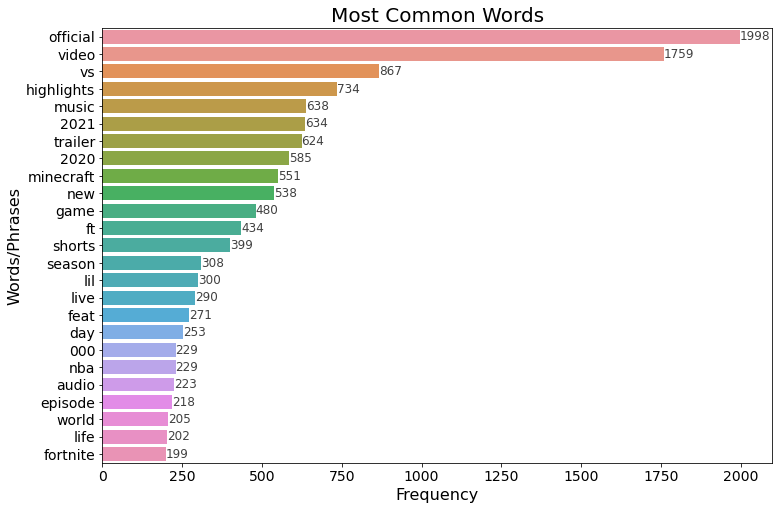

In [354]:
plot_word_freq(one_word_filtered, 25, 'Most Common Words', 'common_words.png')

In [355]:
# most common 2-word phrases in titles
two_words = print_dict_sort(title_analysis(final['title'], 2), True)
two_words

{'official video': 718,
 'music video': 569,
 'official music': 526,
 'among us': 243,
 'official trailer': 224,
 'video oficial': 188,
 'official audio': 172,
 'game highlights': 172,
 'in the': 170,
 'of the': 160,
 'full game': 147,
 'to the': 139,
 'reacts to': 137,
 'minecraft but': 131,
 'how to': 126,
 'highlights nfl': 113,
 'on the': 109,
 'friday night': 104,
 'at the': 98,
 'nfl 2020': 94,
 'for the': 91,
 'lyric video': 91,
 'night funkin': 91,
 'from the': 90,
 'in minecraft': 82,
 'in among': 78,
 'the world': 73,
 'cbs sports': 71,
 'extended highlights': 71,
 'video ft': 70,
 'with the': 70,
 'nbc sports': 67,
 'lil durk': 65,
 'week highlights': 65,
 'lil baby': 61,
 'react to': 61,
 'official teaser': 60,
 'the first': 60,
 'iphone 12': 59,
 'bts 방탄소년단': 58,
 'behind the': 57,
 'official lyric': 57,
 'the best': 57,
 'and the': 55,
 'first take': 55,
 'jake paul': 52,
 'the scenes': 51,
 'this is': 51,
 'the most': 51,
 'what happened': 51,
 'is the': 51,
 'the new': 

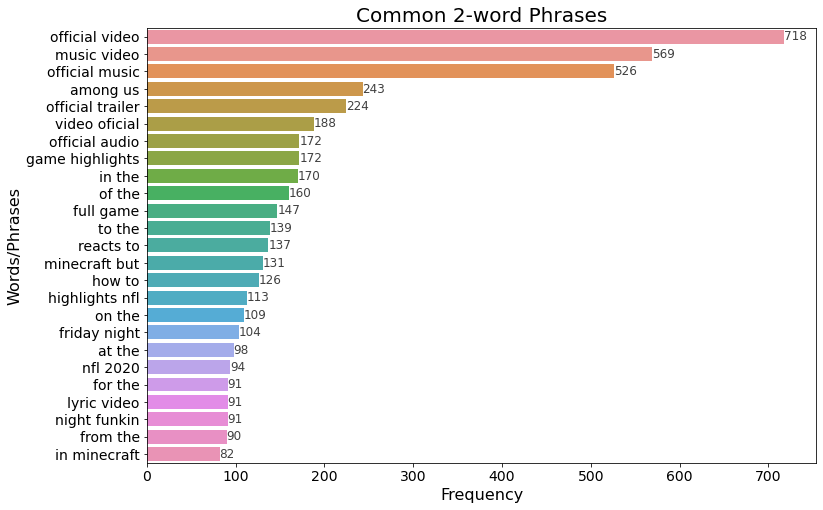

In [356]:
plot_word_freq(two_words, 25, 'Common 2-word Phrases', 'common_2words.png')

In [357]:
# most common 3-word phrases in titles
three_words = print_dict_sort(title_analysis(final['title'], 3), True)
three_words

{'official music video': 526,
 'full game highlights': 141,
 'highlights nfl 2020': 94,
 'friday night funkin': 91,
 'in among us': 78,
 'week highlights nfl': 65,
 'official lyric video': 56,
 'behind the scenes': 51,
 'official video ft': 50,
 'highlights ucl on': 43,
 'ucl on cbs': 43,
 'extended highlights ucl': 40,
 'on cbs sports': 40,
 'mod in among': 36,
 'megan thee stallion': 35,
 'call of duty': 33,
 'the first time': 32,
 'premier league highlights': 32,
 'game highlights september': 32,
 'for the first': 31,
 'live from the': 29,
 'try not to': 29,
 'stephen reacts to': 29,
 'iphone 12 pro': 27,
 'at lakers full': 27,
 'lakers full game': 27,
 'nba on tnt': 27,
 'wings hot ones': 26,
 'official trailer hd': 25,
 'for 24 hours': 25,
 'spicy wings hot': 25,
 'dead by daylight': 25,
 'the kid laroi': 24,
 'season official trailer': 24,
 'machine gun kelly': 24,
 'binging with babish': 23,
 'in hardcore minecraft': 23,
 'not to laugh': 23,
 'in real life': 22,
 'clash of clans

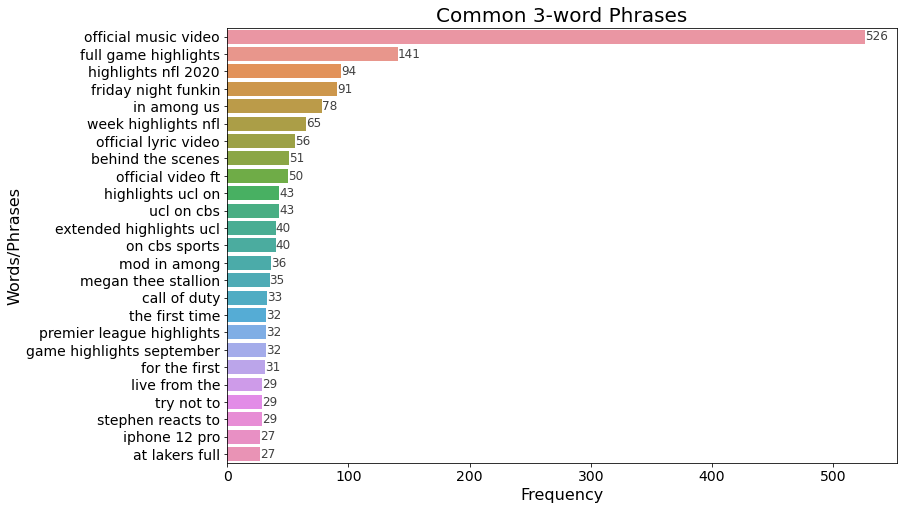

In [358]:
plot_word_freq(three_words, 25, 'Common 3-word Phrases', 'common_3words.png')

In [359]:
# most common 4-word phrases in titles
four_words = print_dict_sort(title_analysis(final['title'], 4), True)
four_words

{'week highlights nfl 2020': 46,
 'highlights ucl on cbs': 43,
 'ucl on cbs sports': 40,
 'mod in among us': 36,
 'extended highlights ucl on': 33,
 'full game highlights september': 32,
 'for the first time': 31,
 'at lakers full game': 27,
 'lakers full game highlights': 27,
 'spicy wings hot ones': 25,
 'try not to laugh': 23,
 'tokyo olympics nbc sports': 22,
 'not to laugh challenge': 21,
 'role in among us': 20,
 'while eating spicy wings': 20,
 'eating spicy wings hot': 20,
 'black ops cold war': 20,
 'full game highlights august': 20,
 'sneaker shopping with complex': 20,
 'youngboy never broke again': 19,
 'call of duty black': 19,
 'of duty black ops': 19,
 'duty black ops cold': 19,
 'week highlights nfl 2021': 19,
 'full game highlights december': 19,
 'goes sneaker shopping with': 18,
 'full game highlights june': 17,
 'tiny desk home concert': 16,
 '2021 bein sports usa': 16,
 'to see if they': 15,
 'embedded vlog series episode': 15,
 'episode breakdown ending explained'

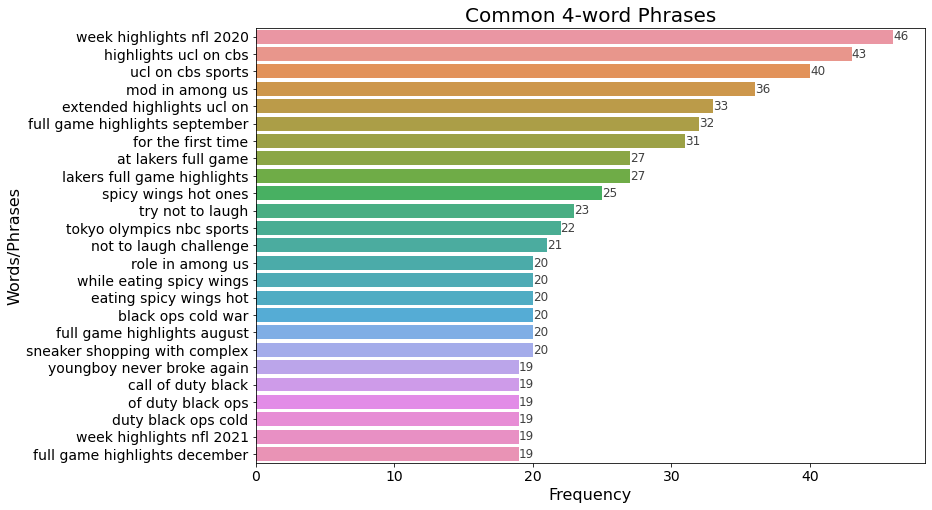

In [361]:
plot_word_freq(four_words, 25, 'Common 4-word Phrases', 'common_4words.png')